In [1]:
%matplotlib inline 

from typing import Callable, Union

import matplotlib.pyplot as plt
import numpy as np

from test_functions import rosenbrock, gradient_rosenbrock

In descent direction iteration we look for direction and learning rate: <br>
$x^{(k+1)} <- x^{(k)} + \alpha^{(k)}d^{(k)}$ <br>
such that the optimization process is efficient. 

#### Gradient Descent 

Having function $f$ at point $f(x^{k})$, the question is at which direction this function changes the most?

$f(x^{k} + \epsilon d^{(k)}) \approx f(x^{k}) + \epsilon \nabla f(x^{k})^{T}d^{(k)}$, where $\epsilon$ is some small number <br><br>
If we contrain $d$ to be a unit vector, then only direction does matter. We see that to minimize the RHS we have to pick d such that it is aligned with gradient. 
<br><br>
So $d^{(k)} = -\nabla f(x^{k})^{T}$ (normalization doesn't matter, we can include it in the learning rate)

Now having chosen d, we must choose $\alpha$. At each iteration we face the following problem: <br>

$\alpha^{k} = argmin_{\alpha} f(x^{(k)} + \alpha d^{(k)})$. <br><br>
This is a function of one variable that we want minimize in k-th iteration. We can compute directional derivative and equal to zero to find local minimum for $\epsilon$. <br><br>
$\nabla f(x^{(k)} + \alpha d^{(k)})^{T}d^{(k)}$ = 0, which can be written as <br><br>
$\nabla f(x^{(k+1)})^{T}d^{(k)}$ = 0 and <br><br>
$d^{(k+1)}d^{(k)}$ = 0

The consecutive directions are orthogonal. The gradien descent zigzags.

In [2]:
def gradient_descent(
    f: Callable[[Union[np.ndarray, float]], float],
    grad_f: Callable[[Union[np.ndarray, float]], Union[np.ndarray, float]],
    alpha: float,
    x_init: Union[np.ndarray, float], 
    epsilon: float = 1e-09, 
    max_iter: int = 500
):
    x = x_init
    i = 0
    directions = []
    diff = 1e3

    while i < max_iter and diff > epsilon:
        # determine direction 
        d = grad_f(x)
        directions.append(d)
        
        # update 
        x_new = x - alpha * d 
        
        diff = np.abs(f(x_new) - f(x))
        x = x_new 
        i += 1 
        
    
    return directions, x, i, diff

In [3]:
%%time 
ds, x_opt, iterations, diff = gradient_descent(
    rosenbrock, 
    gradient_rosenbrock, 
    alpha=0.01, 
    x_init=np.zeros(2),
    max_iter=10000
)

CPU times: user 33.5 ms, sys: 0 ns, total: 33.5 ms
Wall time: 32.8 ms


In [4]:
iterations, diff

(1741, 9.986496895498472e-10)

In [5]:
x_opt # [a, a ** 2] = [1, 1]

array([0.99964786, 0.99926744])

In [6]:
np.sum(ds[0] * ds[1])

3.91968

In [7]:
np.sum(ds[1] * ds[2])

3.76215635765692

In [8]:
np.sum(ds[3] * ds[4])

3.4514320772986036

In [9]:
consecutive_dot_products = []
for i in range(1, iterations):
    consecutive_dot_products.append(np.sum(ds[i - 1] * ds[i]))

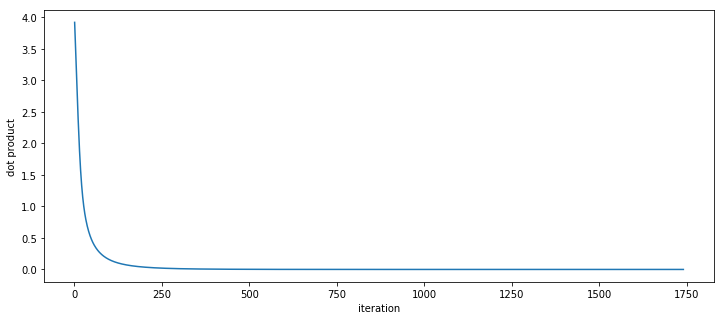

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(np.arange(1, iterations), consecutive_dot_products)
plt.xlabel('iteration')
plt.ylabel('dot product');

The closer to the minimum it is, the more zig-zag pattern is observed (it might be due to this specific test function). If we optimized $\alpha$ at each iteration instead of using fixed on, we would have flat line at 0. 

Very flat function case

In [11]:
# univariate exponential function 

exp_function = lambda x: -np.exp(-x ** 2)
exp_gradient = lambda x: 2 * x * np.exp(-x ** 2)

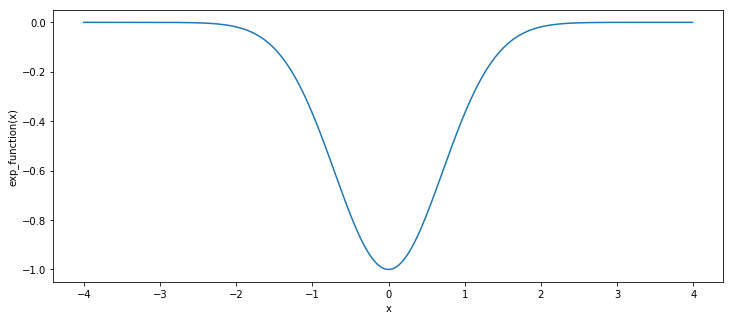

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs])
plt.xlabel('x')
plt.ylabel('exp_function(x)');

In [13]:
%%time 
ds, x_opt, iterations, diff = gradient_descent(
    exp_function, 
    exp_gradient, 
    alpha=0.01, 
    x_init=-4,
    max_iter=10000
)

CPU times: user 313 µs, sys: 199 µs, total: 512 µs
Wall time: 174 µs


In [14]:
iterations, diff

(1, 8.105066300199839e-15)

Our derivative is almost zero

In [15]:
def gradient_descent_walk(
    grad_f: Callable[[Union[np.ndarray, float]], Union[np.ndarray, float]],
    alpha: float,
    x_init: Union[np.ndarray, float], 
    n_iter: int = 500
):
    x = x_init
    trajectory = [x]
    ds = []
    for i in range(n_iter):
        d = grad_f(x)
        x_new = x - alpha * d   
        x = x_new
        trajectory.append(x)
        ds.append(d)
    
    return trajectory, ds 

In [16]:
%%time 
iterations = 10000
trajectory, ds = gradient_descent_walk(exp_gradient, alpha=0.01, x_init=-4, n_iter=iterations)

CPU times: user 22.6 ms, sys: 6.98 ms, total: 29.6 ms
Wall time: 15.4 ms


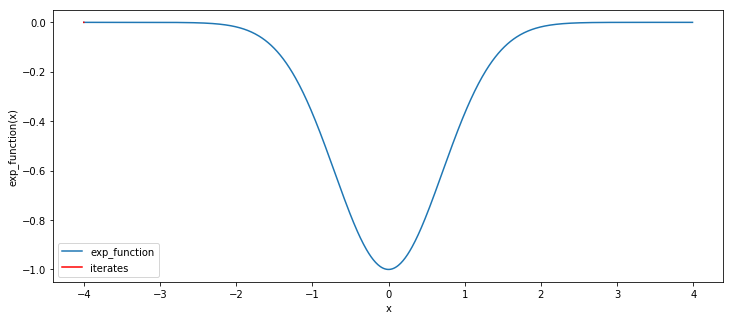

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();

In [18]:
consecutive_dot_products = []
for i in range(1, iterations):
    consecutive_dot_products.append(np.sum(ds[i - 1] * ds[i]))

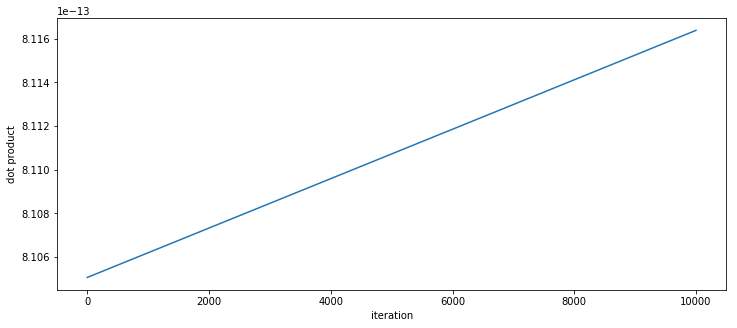

In [19]:
afig, ax = plt.subplots(figsize=(12, 5))
plt.plot(np.arange(1, iterations), consecutive_dot_products)
plt.xlabel('iteration')
plt.ylabel('dot product');

In [20]:
%%time 
iterations = 10000
trajectory, ds = gradient_descent_walk(exp_gradient, alpha=10, x_init=-4, n_iter=10000)

CPU times: user 41.7 ms, sys: 50.3 ms, total: 92 ms
Wall time: 30.5 ms


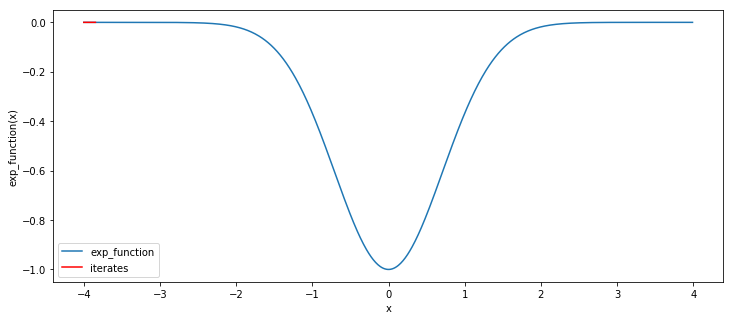

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();

In [22]:
consecutive_dot_products = []
for i in range(1, iterations):
    consecutive_dot_products.append(np.sum(ds[i - 1] * ds[i]))

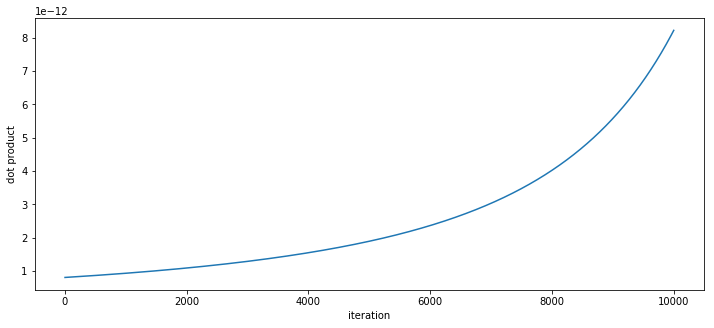

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(np.arange(1, iterations), consecutive_dot_products)
plt.xlabel('iteration')
plt.ylabel('dot product');

In [24]:
%%time 
iterations = 1000000
trajectory, ds = gradient_descent_walk(exp_gradient, alpha=10, x_init=-4, n_iter=1000000)

CPU times: user 1.61 s, sys: 107 ms, total: 1.72 s
Wall time: 1.59 s


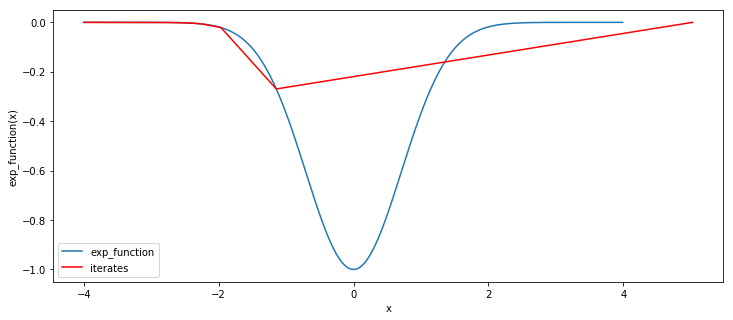

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();

In [26]:
consecutive_dot_products = []
for i in range(1, iterations):
    consecutive_dot_products.append(np.sum(ds[i - 1] * ds[i]))

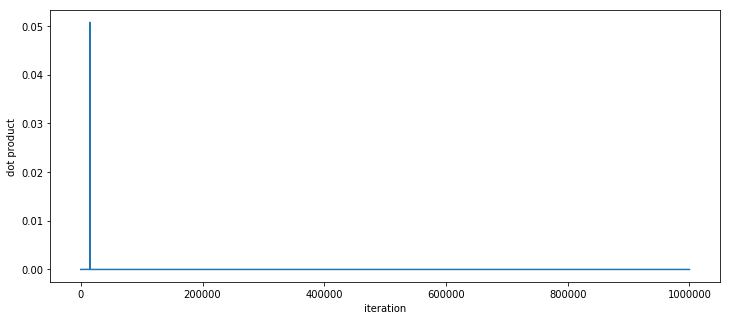

In [27]:
afig, ax = plt.subplots(figsize=(12, 5))
plt.plot(np.arange(1, iterations), consecutive_dot_products)
plt.xlabel('iteration')
plt.ylabel('dot product');

#### Momentum

$v^{(k+1)} = \beta v^{(k)} - \alpha g^{(k)}$ <br>
$x^{(k+1)} = x^{(k)} + v^{(k+1)}$

In [28]:
def momentum_walk(
    f: Callable[[Union[np.ndarray, float]], float],
    grad_f: Callable[[Union[np.ndarray, float]], Union[np.ndarray, float]],
    beta: float, 
    alpha: float,
    x_init: Union[np.ndarray, float], 
    n_iter: int = 500
):
    x = x_init
    trajectory = [x]
    i = 0
    diff = 1e3
    
    if isinstance(x, np.ndarray):
        v = np.zeros_like(x)
    else:
        v = 0

    for i in range(n_iter):
        
        # determine direction 
        d = grad_f(x)
        
        v = beta * v - alpha * d
        
        # update 
        x_new = x + v
        
        # update 
        x_new = x - alpha * d 
        f_new = f(x_new)
        
        diff = np.abs(f_new - f(x))
        x = x_new
        trajectory.append(x)
        i += 1 
        
    
    return trajectory

In [29]:
%%time 
iterations = 10000
trajectory = momentum_walk(exp_function, 
                      exp_gradient, 
                      alpha=0.01, 
                      beta=1, 
                      x_init=-4, 
                      n_iter=iterations)

CPU times: user 57.8 ms, sys: 7.33 ms, total: 65.2 ms
Wall time: 57.8 ms


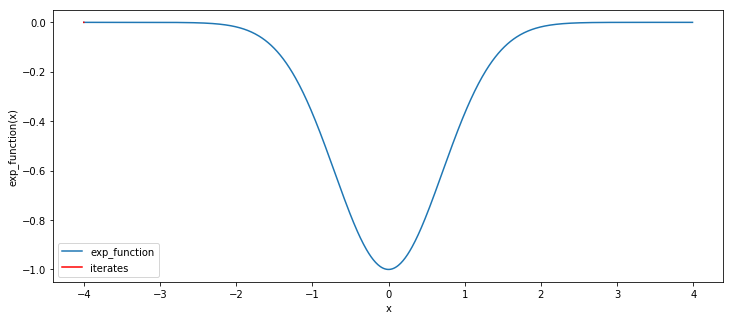

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();

In [31]:
%%time 
iterations = 10000
trajectory = momentum_walk(exp_function, 
                      exp_gradient, 
                      alpha=0.1, 
                      beta=1, 
                      x_init=-4, 
                      n_iter=iterations)

CPU times: user 75.8 ms, sys: 85.4 ms, total: 161 ms
Wall time: 53.6 ms


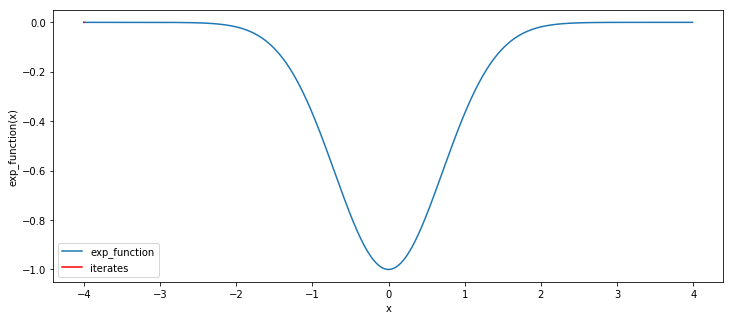

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();

In [33]:
%%time 
iterations = 10000
trajectory = momentum_walk(exp_function, 
                      exp_gradient, 
                      alpha=10, 
                      beta=1, 
                      x_init=-4, 
                      n_iter=iterations)

CPU times: user 88.7 ms, sys: 75.1 ms, total: 164 ms
Wall time: 54.4 ms


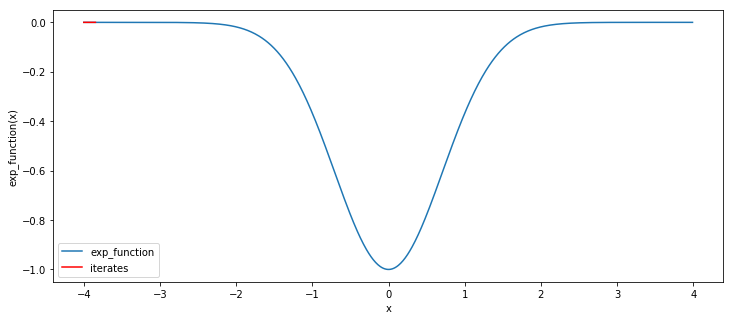

In [34]:
fig, ax = plt.subplots(figsize=(12, 5))
xs = np.arange(-4, 4, step=0.01)
plt.plot(xs, [exp_function(x) for x in xs], label='exp_function')
plt.plot(trajectory, [exp_function(x) for x in trajectory], color='red', label='iterates')
plt.xlabel('x')
plt.ylabel('exp_function(x)')
plt.legend();